In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
scaler=MinMaxScaler()

In [3]:
df_train=pd.read_excel('../input/stock-price-prediction/Train_dataset.xlsx')
df_test=pd.read_excel('../input/stock-price-prediction/Test_dataset.xlsx')

In [4]:
df_train.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


In [5]:
df_train.set_index('Stock Index',inplace=True)

In [6]:
df_train.head(5)

,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
Stock Index,,,,,,,,,,,,,,
AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


# EDA


In [7]:
#NA values
df_train.isna().sum()

Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

In [8]:
# Removing Na values
l=['VWAP','General Index','NAV','P/E Ratio','Volumes Traded','Inventory Turnover','Covid Impact (Beta)','Tracking Error','P/B Ratio','Dollar Exchange Rate','Stock Price','Put-Call Ratio']
def clean(features):
    df_train[features].ffill(inplace=True)
for i in l:
    clean(i)

In [9]:
df_train.isna().sum()

Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64

In [10]:
#unique Indices
df_train['Index'].unique()

array(['NYSE', 'BSE', 'S&P 500', 'NSE', 'JSE'], dtype=object)

In [11]:
#Datatypes
df_train.dtypes

Index                    object
Industry                 object
VWAP                    float64
General Index           float64
NAV                     float64
P/E Ratio               float64
Volumes Traded          float64
Inventory Turnover      float64
Covid Impact (Beta)     float64
Tracking Error          float64
Dollar Exchange Rate    float64
Put-Call Ratio          float64
P/B Ratio               float64
Stock Price             float64
dtype: object

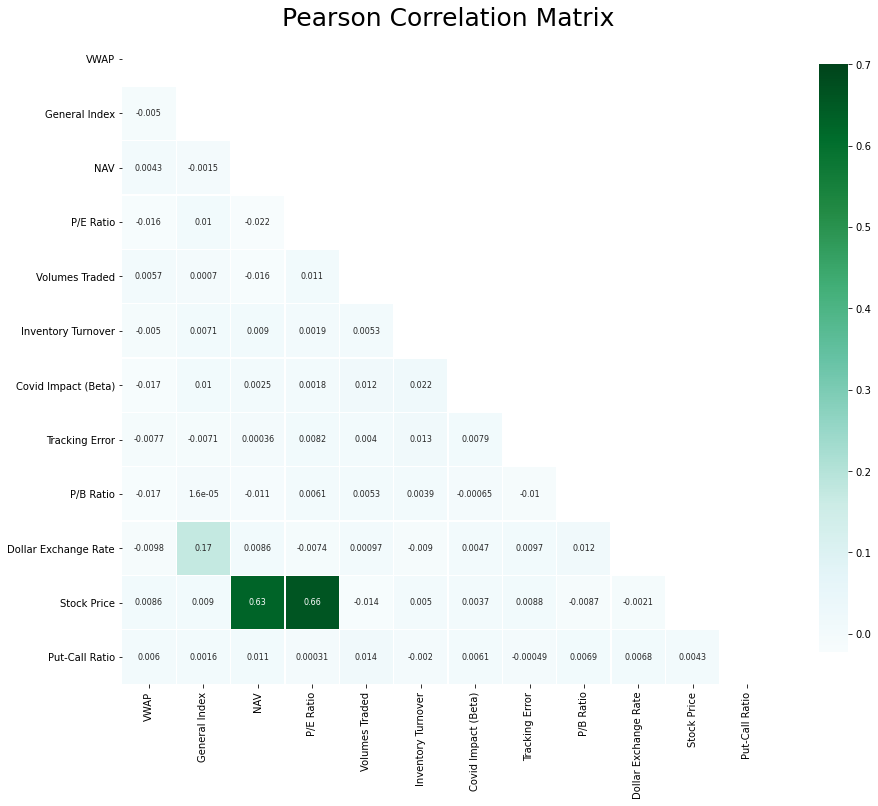

In [12]:
features =['VWAP','General Index','NAV','P/E Ratio','Volumes Traded','Inventory Turnover','Covid Impact (Beta)','Tracking Error','P/B Ratio','Dollar Exchange Rate','Stock Price','Put-Call Ratio']

mask = np.zeros_like(df_train[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_train[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Model Building

In [13]:
#One Hot Encoding
dum=pd.get_dummies(df_train)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr=LinearRegression(normalize=True)
X=dum.drop('Stock Price',1)
#X=X.reset_index()['Stock Index']
Y=dum['Stock Price']
#Y=Y.reset_index()['Stock Price']

x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.3)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8469386706451318

## Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=1000)
R.fit(x_train,y_train)
R.score(x_train,y_train)

0.8463997704613436

## Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
L=Lasso(alpha=100)
L.fit(x_train,y_train)
L.score(x_train,y_train)

0.84603473918678

## Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x_train)
#y=poly.fit_transform(np.array(y_train).reshape(1,-1))
lr.fit(x,y_train)
lr.score(x,y_train)


0.9554436388146371

## Testing dataset

In [18]:
df_test=df_test.set_index(['Stock Index'])


In [19]:
# Removing Na values
l=['VWAP','General Index','NAV','P/E Ratio','Volumes Traded','Inventory Turnover','Covid Impact (Beta)','Tracking Error','P/B Ratio','Dollar Exchange Rate','Put-Call Ratio']
def clean(features):
    df_test[features].ffill(inplace=True)
for i in l:
    clean(i)

In [20]:
dum_test=pd.get_dummies(df_test)

In [21]:
dum_test=poly.fit_transform(dum_test)

In [22]:
df_test['Stock Price']=lr.predict(dum_test)

In [58]:
df_test.to_excel('Output.xlsx')

ValueError: No engine for filetype: 'xlxs'

## **Predicting Put-Call Ratio**

In [24]:
#Selecting only Put-Call Ratio
pcr=df_train.filter(['Put-Call Ratio'])
#Converting to numpy array
dataset=pcr.values
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)

In [25]:
train_len=math.ceil(len(dataset)*0.8)
train_len

5907

In [26]:
train_data=dataset[0:train_len,:]


In [27]:
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

    

In [28]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [29]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5847, 60, 1)

In [30]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
5847/5847 [==============================] - 36s 6ms/step - loss: 0.0895
Epoch 2/10
5847/5847 [==============================] - 35s 6ms/step - loss: 0.0876
Epoch 3/10
5847/5847 [==============================] - 36s 6ms/step - loss: 0.0871
Epoch 4/10
5847/5847 [==============================] - 37s 6ms/step - loss: 0.0876
Epoch 5/10
5847/5847 [==============================] - 37s 6ms/step - loss: 0.0870
Epoch 6/10
5847/5847 [==============================] - 38s 6ms/step - loss: 0.0869
Epoch 7/10
5847/5847 [==============================] - 38s 6ms/step - loss: 0.0870
Epoch 8/10
5847/5847 [==============================] - 37s 6ms/step - loss: 0.0871
Epoch 9/10
5847/5847 [==============================] - 36s 6ms/step - loss: 0.0869
Epoch 10/10
5847/5847 [==============================] - 36s 6ms/step - loss: 0.0869


In [50]:
test_data=dataset[train_len-60:,:]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[train_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [51]:
#convert the data to a numpy array
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape


(1476, 60, 1)

In [52]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [53]:
y_test = dataset[train_len:,:]
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.4766827474769375

In [54]:
valid=pcr[train_len:]
valid['Predicted Put-Call Ratio']=predictions
valid.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Put-Call Ratio,Predicted Put-Call Ratio
Stock Index,,
AC1759,1.08,0.978578
AC1760,0.72,0.978578
AC1761,1.13,0.978578
AC1762,1.05,0.978578
AC1763,1.28,0.978578
